# Plots for CSP projections
### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Sample Data](#2.-Sample-Data)
+ [3. CSP Projections](#3.-CSP-Projections)

---

# 1. Notebook Description

This notebook was used to create explanatory plots for CSP for my thesis.

---

**Imports:**

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mne.decoding import CSP

%matplotlib inline

# 2. Sample Data

In [10]:
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

n = 200
means = [0,0,0]

c1 = -1
#f1 = randrange(n, -10, 10)
#f2 = randrange(n, -10, 10)
#f3 = randrange(n, -10, 10)
cov = [[15, 0, 0], [0, 2, 0], [0,0,10]]
f1, f2, f3 = np.random.multivariate_normal(means, cov, n).T
samples = np.array([f1, f2, f3]).T


c2 = +1
#f1 = randrange(n, -8, 10)
#f2 = randrange(n, -10, 10)
#f3 = randrange(n, -10, 10)

cov = [[7, 0, 0], [0, 13, 0], [0,0,2]]
f1, f2, f3 = np.random.multivariate_normal(means, cov, n).T
samples = np.concatenate([samples, np.array([f1, f2, f3]).T])


targets = np.array( [n*[c1], n*[c2]] ).flatten()

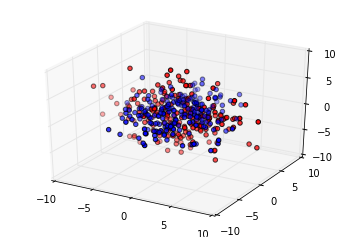

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n, 0],
           ys=samples[:n, 1],
           zs=samples[:n, 2],
           c='r', marker='o')
ax.scatter(xs=samples[n:, 0],
           ys=samples[n:, 1],
           zs=samples[n:, 2],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()

# 3. CSP projection

In [12]:
samples = np.expand_dims(samples, axis=2)
samples = CSP(n_components=2, transform_into='csp_space').fit_transform(samples, targets)

In [13]:
samples = samples[:,:,0]
samples = MinMaxScaler(feature_range=(-10,10)).fit_transform(samples)

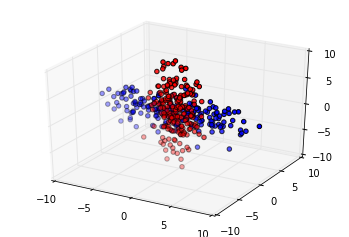

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=samples[:n, 0],
           ys=np.zeros(n),
           zs=samples[:n, 1],
           c='r', marker='o')
ax.scatter(xs=samples[n:, 0],
           ys=np.zeros(n),
           zs=samples[n:, 1],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()

---
Drop z-dimension for better visualization. 

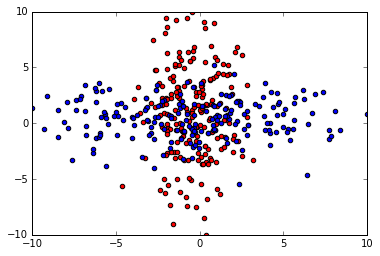

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)


plt.scatter(x=samples[:n, 0],
           y=samples[:n, 1],
           c='r', marker='o')
plt.scatter(x=samples[n:, 0],
           y=samples[n:, 1],
           c='b', marker='o')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ticks = [10,5,0,-5,-10]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

---